#verify pyEMU null space projection with the freyberg problem

In [254]:
%matplotlib inline
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyemu

instaniate ```pyemu``` object and drop prior info.  Then reorder the jacobian and save as binary.  This is needed because the pest utilities require strict order between the control file and jacobian

In [255]:
mc = pyemu.MonteCarlo(jco="freyberg.jcb",verbose=False,forecasts=[])
mc.drop_prior_information()
jco_ord = mc.jco.get(mc.pst.obs_names,mc.pst.par_names)
ord_base = "freyberg_ord"
jco_ord.to_binary(ord_base + ".jco")  
mc.pst.control_data.parsaverun = ' '
mc.pst.write(ord_base+".pst")

Draw some vectors from the prior and write the vectors to par files

In [256]:
# setup the dirs to hold all this stuff
par_dir = "prior_par_draws"
proj_dir = "proj_par_draws"
parfile_base = os.path.join(par_dir,"draw_")
projparfile_base = os.path.join(proj_dir,"draw_")
if os.path.exists(par_dir):
   shutil.rmtree(par_dir)
os.mkdir(par_dir)
if os.path.exists(proj_dir):
   shutil.rmtree(proj_dir)
os.mkdir(proj_dir)
mc = pyemu.MonteCarlo(jco=ord_base+".jco")
# make some draws
mc.draw(10)
#for i in range(10):
#    mc.parensemble.iloc[i,:] = i+1
#write them to files
mc.parensemble.index = [str(i+1) for i in range(mc.parensemble.shape[0])]
mc.parensemble.to_parfiles(parfile_base)
mc.parensemble.shape

(10, 761)

Run pnulpar

In [257]:
exe = os.path.join("pnulpar.exe")
args = [ord_base+".pst","y","1","y","pnulpar_qhalfx.mat",parfile_base,projparfile_base]
in_file = os.path.join("misc","pnulpar.in")
with open(in_file,'w') as f:
    f.write('\n'.join(args)+'\n') 
os.system(exe + ' <'+in_file)


0

In [258]:
pnul_en = pyemu.ParameterEnsemble(mc.pst)
parfiles =[os.path.join(proj_dir,f) for f in os.listdir(proj_dir) if f.endswith(".par")]
pnul_en.read_parfiles(parfiles)

In [259]:
pnul_en.loc[:,"fname"] = pnul_en.index
pnul_en.index = pnul_en.fname.apply(lambda x:str(int(x.split('.')[0].split('_')[-1])))
f = pnul_en.pop("fname")

In [260]:

pnul_en.sort_index(axis=1,inplace=True)
pnul_en.sort_index(axis=0,inplace=True)
pnul_en

parnme,hkr00c00,hkr00c01,hkr00c02,hkr00c03,hkr00c04,hkr00c05,hkr00c06,hkr00c07,hkr00c08,hkr00c09,...,wf2_1,wf2_2,wf3_1,wf3_2,wf4_1,wf4_2,wf5_1,wf5_2,wf6_1,wf6_2
fname,,,,,,,,,,,,,,,,,,,,,
1,32.368320,24.054910,1.467802,0.594751,0.594751,12.162060,12.065550,0.594751,25.659500,7.991690,...,353.3683,494.074,356.3220,527.223,69.82040,89.2460,63.88345,93.6986,368.8262,520.204
10,0.594751,3.190510,18.675000,29.319700,0.594751,0.594751,51.750600,0.594751,34.068550,16.343550,...,359.7287,433.168,356.7614,407.794,76.95257,131.1040,64.70907,97.9912,377.0157,344.630
2,0.594751,0.594751,34.801180,13.344150,0.594751,2.578159,30.684060,24.569180,1.210461,13.566150,...,318.8160,575.306,370.6560,472.688,76.24592,100.7780,61.45727,86.7018,351.1401,302.088
3,2.959624,5.538510,0.594751,8.923701,17.986750,12.318020,0.594751,5.139230,27.388490,5.356342,...,377.8597,538.596,324.3792,444.189,69.51773,108.2190,64.21497,78.6594,382.4348,404.126
4,0.594751,17.403810,30.945870,0.634272,0.594751,0.594751,0.594751,34.948340,15.178260,15.380730,...,346.5252,334.947,343.9852,439.187,73.47468,47.1324,58.85037,75.5839,339.0903,478.399
5,3.825664,20.217080,23.504680,20.902150,11.514750,0.594751,2.996188,35.924230,5.883118,13.185810,...,339.8219,566.766,343.9746,351.003,69.16484,134.4600,66.56200,100.9690,371.6124,478.835
6,22.037630,8.117125,0.594751,31.333380,4.275907,22.021320,0.594751,35.900590,9.472975,0.594751,...,383.4496,519.875,349.4286,456.712,69.40407,94.8979,63.71719,57.7090,371.2866,497.205
7,0.594751,0.594751,0.594751,3.404048,0.594751,2.939669,0.594751,15.172950,21.786090,0.594751,...,357.5747,300.231,353.7712,389.440,66.71358,90.7764,60.14159,96.4940,367.9868,381.048
8,26.763320,0.594751,0.594751,21.481100,5.563727,35.382990,14.001830,20.966320,9.538188,26.678570,...,350.9159,661.250,322.0340,525.383,72.70453,104.5070,65.02815,99.0708,386.6772,469.489


Now for pyemu

In [261]:
print(mc.parensemble.istransformed)
mc.parensemble._transform()
en = mc.project_parensemble(nsing=1,inplace=False)
print(mc.parensemble.istransformed)
#en._back_transform()

False
using 1 singular components
True


In [262]:
en.sort_index(axis=1,inplace=True)
en.sort_index(axis=0,inplace=True)
en

parnme,hkr00c00,hkr00c01,hkr00c02,hkr00c03,hkr00c04,hkr00c05,hkr00c06,hkr00c07,hkr00c08,hkr00c09,...,wf2_1,wf2_2,wf3_1,wf3_2,wf4_1,wf4_2,wf5_1,wf5_2,wf6_1,wf6_2
1,32.3684,24.0549,1.46781,0.594751,0.594751,12.1621,12.0656,0.594751,25.6595,7.99169,...,353.368,494.074,356.322,527.223,69.8204,89.246,63.8835,93.6986,368.826,520.204
10,0.594751,3.19051,18.675,29.3197,0.594751,0.594751,51.7506,0.594751,34.0686,16.3436,...,359.728,433.168,356.761,407.794,76.9526,131.104,64.709,97.9912,377.015,344.63
2,0.594751,0.594751,34.8011,13.3442,0.594751,2.57815,30.6841,24.5692,1.21046,13.5661,...,318.816,575.306,370.656,472.688,76.2459,100.778,61.4572,86.7018,351.14,302.088
3,2.95963,5.53851,0.594751,8.9237,17.9868,12.3181,0.594751,5.13923,27.3885,5.35634,...,377.86,538.596,324.379,444.189,69.5177,108.219,64.215,78.6594,382.435,404.126
4,0.594751,17.4038,30.9458,0.634272,0.594751,0.594751,0.594751,34.9483,15.1783,15.3807,...,346.525,334.947,343.985,439.187,73.4746,47.1324,58.8503,75.5839,339.091,478.399
5,3.82567,20.217,23.5047,20.9022,11.5148,0.594751,2.99619,35.9243,5.88312,13.1858,...,339.822,566.766,343.974,351.003,69.1649,134.46,66.562,100.969,371.613,478.835
6,22.0377,8.11712,0.594751,31.3333,4.27591,22.0213,0.594751,35.9006,9.47297,0.594751,...,383.449,519.875,349.429,456.712,69.4041,94.8979,63.7172,57.709,371.287,497.205
7,0.594751,0.594751,0.594751,3.40405,0.594751,2.93967,0.594751,15.1729,21.7861,0.594751,...,357.574,300.231,353.771,389.44,66.7136,90.7764,60.1416,96.494,367.987,381.048
8,26.7633,0.594751,0.594751,21.4811,5.56373,35.383,14.0019,20.9664,9.53819,26.6786,...,350.916,661.25,322.034,525.383,72.7045,104.507,65.0282,99.0708,386.677,469.489
9,19.0668,0.594751,0.594751,0.594751,5.03371,23.9318,12.7347,0.594751,0.594751,12.1028,...,333.111,303.746,336.406,531.864,69.7366,113.219,61.1386,54.7499,371.131,246.654


parnme,hkr00c00,hkr00c01,hkr00c02,hkr00c03,hkr00c04,hkr00c05,hkr00c06,hkr00c07,hkr00c08,hkr00c09,...,wf2_1,wf2_2,wf3_1,wf3_2,wf4_1,wf4_2,wf5_1,wf5_2,wf6_1,wf6_2
fname,,,,,,,,,,,,,,,,,,,,,
1,0.000144832,0.000126584,0.000231259,1.8667e-14,1.8667e-14,0.000331802,0.000451779,1.8667e-14,5.49537e-05,3.94949e-05,...,3.23516e-05,3.55204e-05,8.30892e-05,5.82978e-05,3.899e-05,1.74548e-05,1.17048e-05,5.03614e-05,0.000127255,7.03332e-05
10,1.8667e-14,6.99555e-05,0.000167963,0.000168819,1.8667e-14,1.8667e-14,4.70746e-05,1.8667e-14,0.000144953,0.000185797,...,7.11492e-05,1.7359e-05,2.7779e-05,0.000103865,1.8724e-05,0.000317575,6.88881e-05,2.4209e-05,9.99989e-05,0.000133153
2,1.8667e-14,1.8667e-14,0.000104202,0.000304544,1.8667e-14,0.000159807,0.000163784,0.000110752,3.11458e-05,0.000325546,...,0,2.24397e-05,0,3.49104e-05,2.63219e-05,2.74663e-05,6.86929e-05,2.43463e-05,0.000140495,4.83554e-05
3,9.70384e-05,8.3e-05,1.8667e-14,1.44828e-05,0.000126777,0.000306352,1.8667e-14,8.33266e-06,4.30235e-05,6.34924e-05,...,6.2949e-06,4.36507e-05,9.42097e-05,6.28557e-05,7.50693e-06,0.000370161,2.42252e-05,4.34148e-06,6.48396e-05,8.19325e-05
4,1.8667e-14,0.000266039,0.000139359,4.31391e-05,1.8667e-14,1.8667e-14,1.8667e-14,9.19543e-05,7.4773e-06,0.000231781,...,1.14189e-06,7.99951e-05,5.05548e-05,2.50365e-05,6.29952e-05,4.50325e-05,6.24335e-05,1.52157e-05,9.79763e-05,5.34919e-05
5,8.57784e-05,0.000182949,4.98021e-05,0.000133858,8.01705e-05,1.8667e-14,2.6798e-05,0.000109859,1.1271e-05,6.63879e-05,...,5.47227e-05,7.90047e-05,8.31012e-05,6.81982e-05,2.25156e-05,0,4.39092e-05,7.25083e-05,0.000127558,3.28203e-05
6,0.000204384,3.87505e-05,1.8667e-14,0.000132607,2.78135e-05,1.66236e-05,1.8667e-14,0.000124679,4.6604e-05,1.8667e-14,...,0.00011623,6.70249e-05,1.66076e-05,1.07506e-05,2.03938e-05,1.52753e-05,3.56335e-05,4.12687e-05,0.000116823,7.18949e-05
7,1.8667e-14,1.8667e-14,1.8667e-14,1.10113e-05,1.8667e-14,8.30461e-05,1.8667e-14,0.000304297,9.16423e-06,1.8667e-14,...,0.000113827,3.0981e-05,7.70089e-05,5.04953e-05,1.31802e-05,5.18973e-05,6.21981e-05,2.02737e-05,1.70377e-05,7.27454e-05
8,4.0552e-05,1.8667e-14,1.8667e-14,9.26858e-05,4.90473e-05,0.000121392,0.000213627,0.000218846,2.58649e-05,1.46027e-06,...,9.1544e-05,6.92542e-05,4.68586e-05,6.60301e-05,1.97654e-05,0.00010615,3.00484e-05,1.1917e-05,6.86689e-05,9.81691e-05


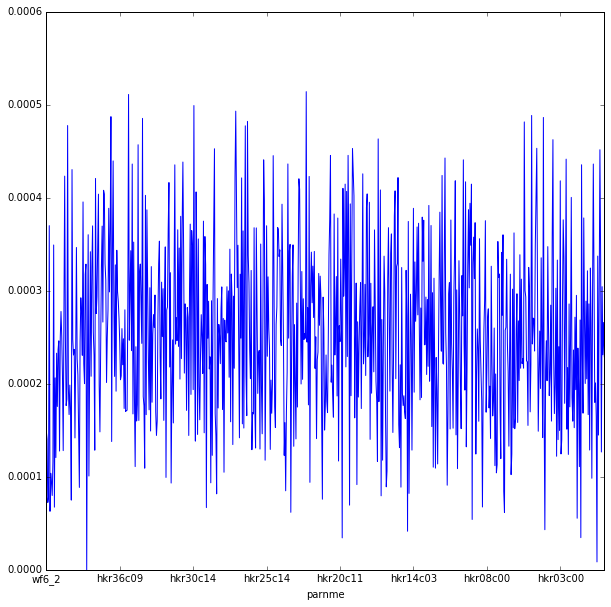

In [263]:
#pnul_en.sort(inplace=True)
#en.sort(inplace=True)
diff = 100.0 * np.abs(pnul_en - en) / en

#diff[diff<1.0] = np.NaN
dmax = diff.max(axis=0)
dmax.sort_index(ascending=False,inplace=True)
dmax.plot(figsize=(10,10))
diff

In [264]:
en.loc[:,"wf6_2"]

1     520.204
10     344.63
2     302.088
3     404.126
4     478.399
5     478.835
6     497.205
7     381.048
8     469.489
9     246.654
Name: wf6_2, dtype: object

In [265]:
pnul_en.loc[:,"wf6_2"]

fname
1     520.204
10    344.630
2     302.088
3     404.126
4     478.399
5     478.835
6     497.205
7     381.048
8     469.489
9     246.654
Name: wf6_2, dtype: float64